<a href="https://colab.research.google.com/github/Jyoti1706/Deep_Reinforcement_Learning/blob/main/RL_For_Trading_gmedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.1
    Uninstalling tensorflow-2.12.1:
      Successfully

In [2]:
! pip install --upgrade gym==0.22.0
! pip install --upgrade gym_anytrading==1.2.0
! pip install --upgrade torch==2.2.1
! pip install --upgrade stable_baselines3==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
! pip install --upgrade scikit-learn

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='-1'

In [31]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
df = pd.read_csv("/content/sample_data/gmedata.csv")

In [16]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


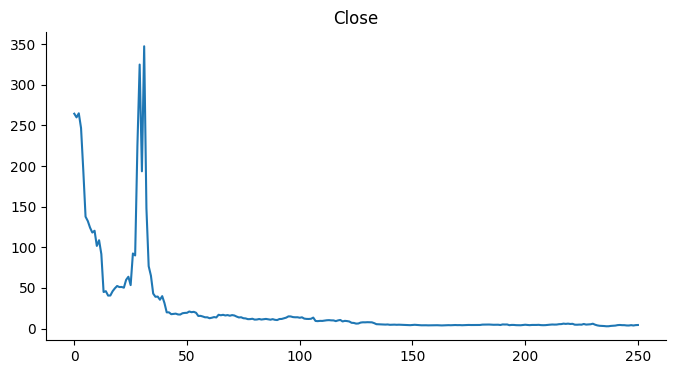

In [11]:
# @title Close

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [18]:
df.set_index('Date', inplace=True)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


### Build Environment

In [20]:
env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)

In [22]:
env.prices

array([137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,  91.71,
        44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,  51.1 ,
        51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  , 225.  ,
       325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,  39.12,
        39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,  18.08,
        18.36,  17.37,  17.25,  18.84,  19.26,  19.38,  20.99,  20.15,
        20.57,  19.46,  15.53,  15.63,  14.83,  13.85,  13.85,  12.72,
        13.31,  14.12,  13.66,  16.94,  16.35,  16.9 ,  16.12,  16.58,
        15.8 ,  16.56,  16.08,  14.75,  13.67,  13.9 ,  12.71,  12.46,
        11.57,  11.63,  12.06,  11.01,  11.13,  11.75,  11.1 ,  11.49,
        11.86,  11.45,  10.91,  11.57,  10.75,  10.47,  11.73,  11.82,
        12.69,  13.45,  15.  ,  14.91,  14.1 ,  13.86,  13.91])

In [21]:
env.signal_features

array([[ 1.3774e+02,  0.0000e+00],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,  1.3500e+02],
       [ 3.2500e+02,  1.0000e+02],
       [ 1.9360e+02, -1.3140e+02],
       [ 3.4751e+02,  1.5391e+02],
       [ 1.4798e+02, -1.9953e+02],
       [ 7.6790e+01,

In [27]:
env.action_space  # Sell, Buy

Discrete(2)

info: {'total_reward': -236.37, 'total_profit': 0.11117627901580537, 'position': 0}


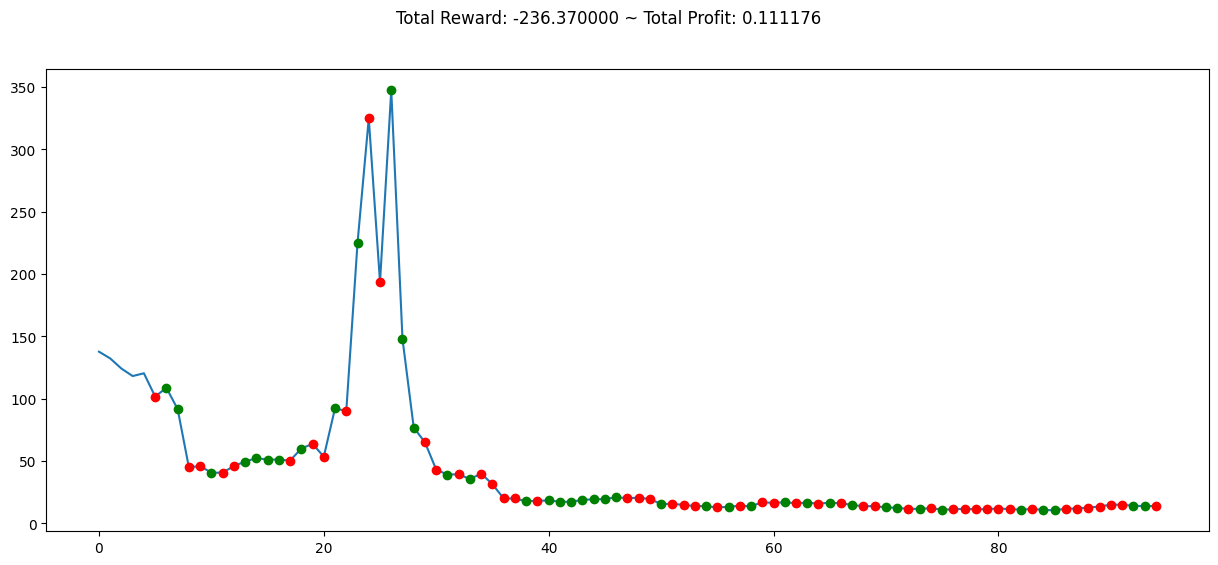

In [26]:
state = env.reset()
while True:
  action = env.action_space.sample() #Randomly Buy and Sell the Action
  obs, reward, done, info = env.step(action)
  #done = terminated or truncated
  if done:
    print(f"info: {info}")
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

### 3. Build Environment and Train

In [29]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
# Registed policy type are: ['MlpPolicy', 'CnnPolicy', 'MultiInputPolicy']!"
model = A2C('MlpPolicy', env, verbose=1)
#model. learn(total_timesteps=1000000)
model. learn(total_timesteps=1000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 2.41e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 504       |
|    iterations         | 61100     |
|    time_elapsed       | 605       |
|    total_timesteps    | 305500    |
| train/                |           |
|    entropy_loss       | -2.61e-06 |
|    explained_variance | 0.00336   |
|    learning_rate      | 0.0007    |
|    n_updates          | 61099     |
|    policy_loss        | -0        |
|    value_loss         | 1.56e-06  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 504      |
|    iterations         | 61200    |
|    time_elapsed       | 606      |
|    total_timesteps    | 306000   |
| train/                |          |
|    entropy_loss       | -0.00528 |
|    explained_variance | 0.734    |
|    lea

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()